In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [3]:
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
imgs_path="C:/Users/yako_/Downloads/archive/Train"
data_list=[]
labels_list=[]
classes_list=43

for i in range (classes_list):
    i_path=os.path.join(imgs_path,str(i))
    for img in os.listdir(i_path):
        im=Image.open(i_path+"/"+img)
        im=im.resize((32,32))
        im=np.array(im)
        data_list.append(im)
        labels_list.append(i)
data=np.array(data_list)
labels=np.array(labels_list)

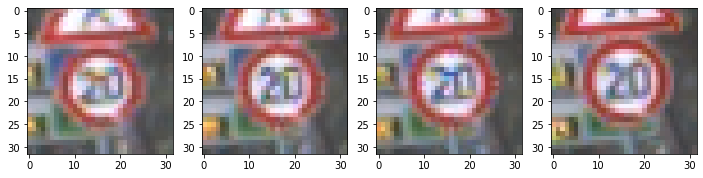

In [5]:
plt.figure(figsize=(12,12))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(data[i],cmap="gray")

In [6]:
def prep_dataset(X,y):
    X_prep=X.astype("float32")
    y_prep=to_categorical(np.array(y))
    return (X_prep,y_prep)

X,y=prep_dataset(data,labels)

In [7]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.6,shuffle=True,stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_val,y_val,test_size=0.5,shuffle=True)

In [10]:
from keras.layers import BatchNormalization,Dropout,Dense
from keras.models import Sequential
model=Sequential()

model.add(layers.Conv2D(128,(3,3),activation="relu",padding="same",input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(layers.MaxPool2D(strides=2))
model.add(BatchNormalization())

model.add(layers.Flatten())

model.add(Dense(4000,activation="relu"))

model.add(Dense(43,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)       

In [11]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [13]:
history=model.fit(X_train,y_train,
                 epochs=5,
                 batch_size=128,
                 validation_data=(X_val,y_val))

Epoch 1/5
123/123 [==============================] - 285s 2s/step - loss: 0.0698 - accuracy: 0.9775 - val_loss: 0.0894 - val_accuracy: 0.9732
Epoch 2/5
123/123 [==============================] - 347s 3s/step - loss: 0.0570 - accuracy: 0.9816 - val_loss: 0.1610 - val_accuracy: 0.9532
Epoch 3/5
123/123 [==============================] - 290s 2s/step - loss: 0.0601 - accuracy: 0.9810 - val_loss: 0.0617 - val_accuracy: 0.9838
Epoch 4/5
123/123 [==============================] - 289s 2s/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.0991 - val_accuracy: 0.9743
Epoch 5/5
123/123 [==============================] - 321s 3s/step - loss: 0.0381 - accuracy: 0.9870 - val_loss: 0.0878 - val_accuracy: 0.9755


In [17]:
test=pd.read_csv("C:/Users/yako_/Downloads/archive/Test.csv")
test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [18]:
test_labels=test["ClassId"].values
test_img_path="C:/Users/yako_/Downloads/archive"
test_imgs=test["Path"].values

In [27]:
test_data=[]
test_labels=[]

for img in test_imgs:
    im=Image.open(test_img_path+"/"+img)
    im=im.resize((32,32))
    im=np.array(im)
    test_data.append(im)
test_data=np.array(test_data)
print(test_data.shape)
test_labels=test["ClassId"].values
test_labels

(12630, 32, 32, 3)


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
pred=np.argmax(model.predict(test_data),axis=1)
print("accuracy score:",accuracy_score(test_labels,pred))

395/395 [==============================] - 37s 93ms/step
accuracy score: 0.8980997624703088


In [33]:
model.save("gtsrb_classifier.h5")